<h1>Unveiling Twitter Sentiment: Analyzing and Visualizing Public Opinion on Various Entities</h1>
This project delves into the world of Twitter sentiment analysis, exploring the public's opinion towards different entities. By harnessing the power of Python libraries, we embark on a journey to:<br>
1. Extract and analyze tweets<br>
2. Uncover hidden patterns<br>
3. Gain granular insights

The dataset can be downloaded from <a href="https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis">Kaggle</a><br>

[1. Library imports and Data Reading](#cell_1)<br>
[2. Data Cleaning](#cell_2)<br>
[3. Exporatory Data Analysis](#cell_3)<br>

<h2>Library imports and Data Reading</h2>
<a id = "cell_1"></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [94]:
df= pd.read_csv("twitter_training.csv",names=["id","entity","sentiment","tweet"])
df

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


<h2>Data Cleaning</h2>
<a id = "cell_2"></a>

In [95]:
df.isnull().sum()

id             0
entity         0
sentiment      0
tweet        686
dtype: int64

In [96]:
df = df.dropna()

In [97]:
df.isnull().sum()

id           0
entity       0
sentiment    0
tweet        0
dtype: int64

In [98]:
df.duplicated().sum()

2340

In [99]:
df = df.drop_duplicates()

In [100]:
df.duplicated().sum()

0

<Axes: xlabel='tweet length', ylabel='Count'>

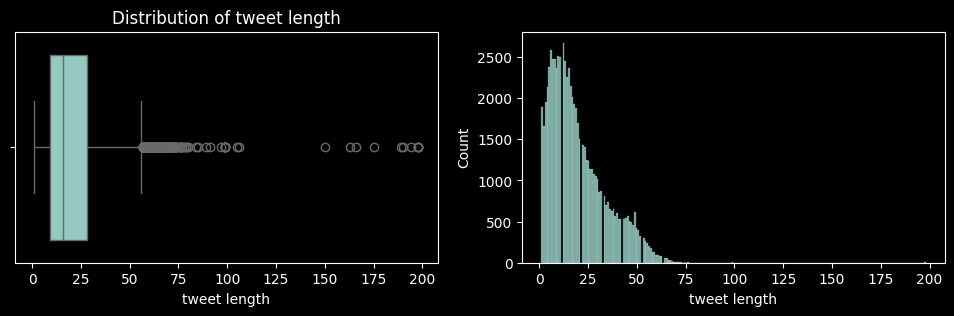

In [101]:
df["tweet length"] = df["tweet"].map(lambda x:len(x.split(" ")))

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(x="tweet length",data=df).set(title='Distribution of tweet length')
plt.subplot(1,2,2)
sns.histplot(x="tweet length",data=df)

In [102]:
q1 = np.percentile(df['tweet length'],25)
median = np.percentile(df['tweet length'],50)
q3 = np.percentile(df['tweet length'],75)

iqr = q3-q1
lower = q1 - 1.5*iqr
higher = q3 +1.5*iqr

df = df[(df["tweet length"]>=lower)&(df["tweet length"]<=higher)]

<Axes: xlabel='tweet length', ylabel='Count'>

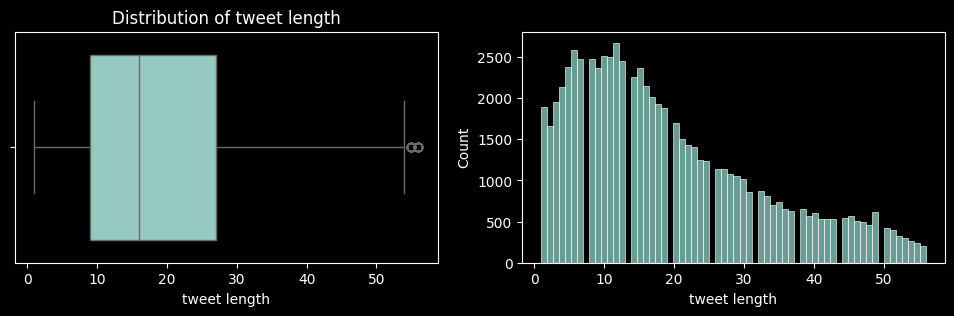

In [103]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(x="tweet length",data=df).set(title='Distribution of tweet length')
plt.subplot(1,2,2)
sns.histplot(x="tweet length",data=df)

<h2>Exploratory Data Analytics</h2>
<a id = "cell_3"></a>

<Axes: xlabel='sentiment', ylabel='count'>

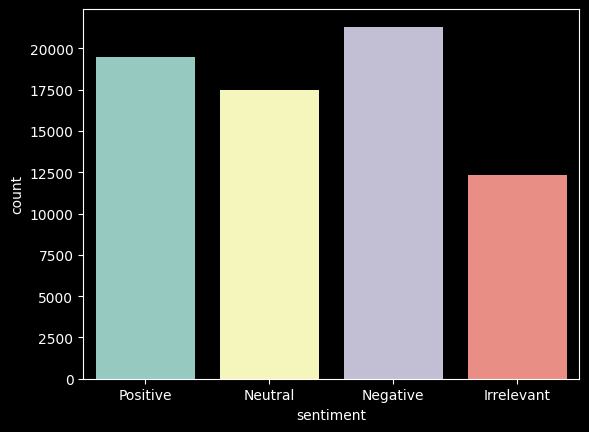

In [104]:
sns.countplot(x="sentiment",data=df,hue="sentiment")

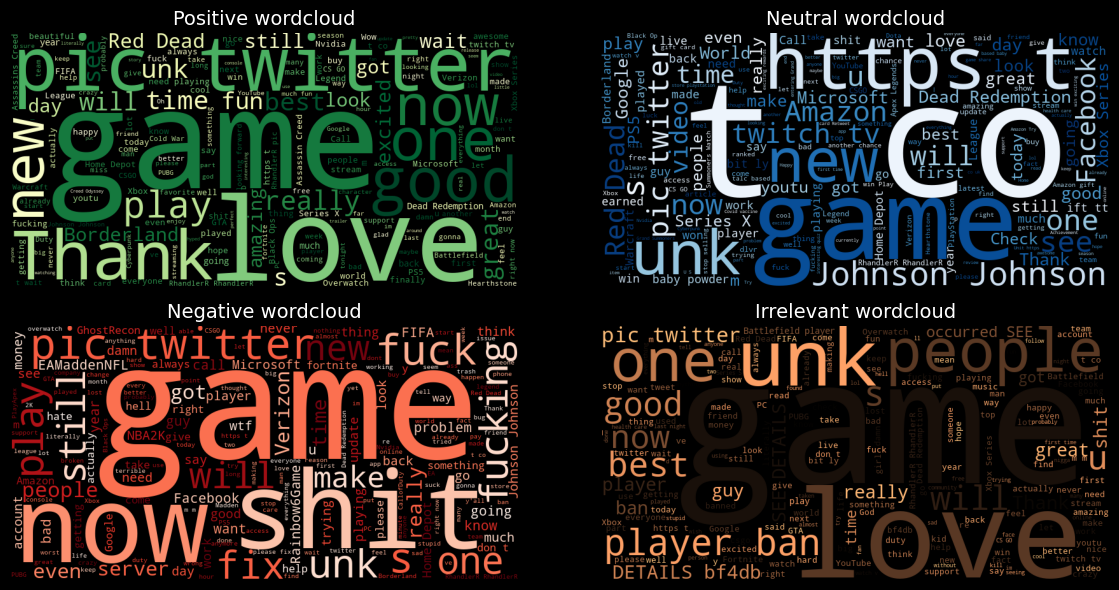

In [105]:
sentiment_list=["Positive","Neutral","Negative","Irrelevant"]
colormap_list=["YlGn_r","Blues_r","Reds_r","copper_r"]
stopwords_set = set(STOPWORDS)
i=1

plt.figure(figsize=(12,6))
for sentiment,colormap in zip(sentiment_list,colormap_list):
    
    text = " ".join(content for content in df[df["sentiment"]==sentiment]["tweet"])
    wordcloud = WordCloud(colormap=colormap, stopwords=stopwords_set, width=800, height=400).generate(text)
    
    plt.subplot(2,2,i)
    plt.imshow(wordcloud)
    plt.title(sentiment+" wordcloud", fontsize=14)
    plt.axis('off')
    i+=1
    
plt.tight_layout()

Text(0.5, 1.0, 'Frequency of entity')

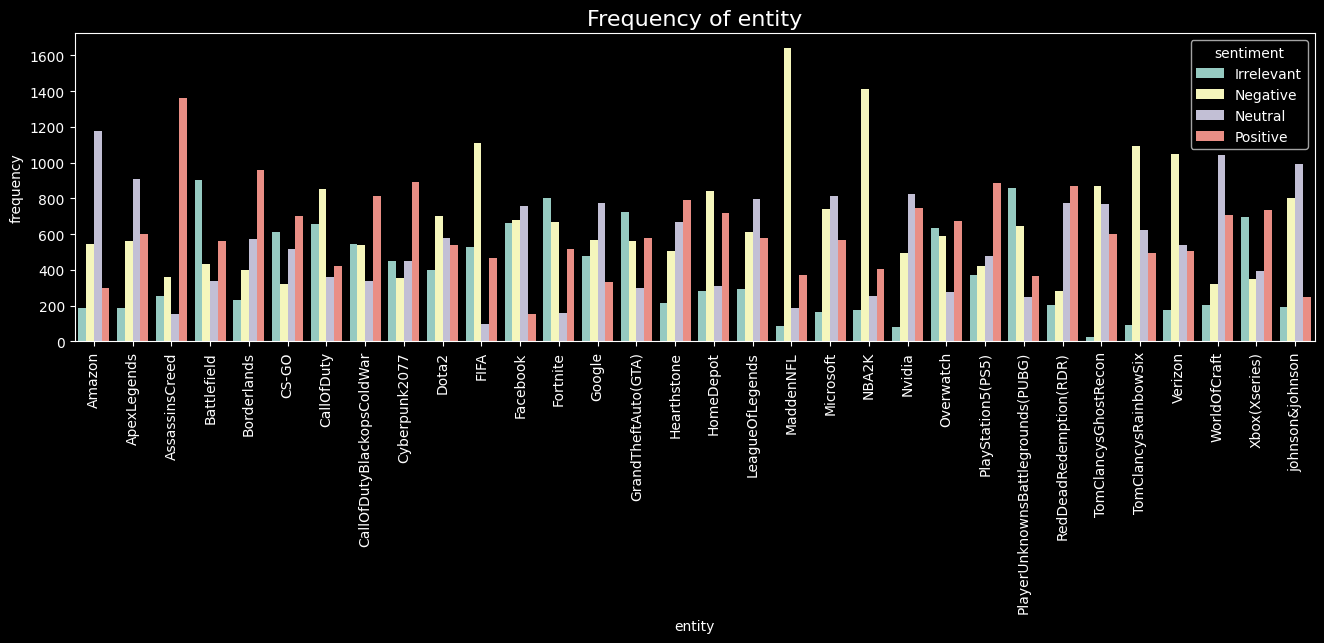

In [106]:
entity_frequency = df.groupby(["sentiment","entity"]).size().reset_index()
entity_frequency.rename(columns={0: 'frequency'}, inplace=True)

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.barplot(data=entity_frequency,x="entity",y="frequency",hue="sentiment").set_title("Frequency of entity", fontsize=16)